First we're going to use the UC Irvince cancer prognosis dataset. The goal of this dataset is to create a regression model to predict the recurrence time of breast cancer patients, the time it takes for the cancer to recur. 

Don't worry about the setup. We're focusing on the visualizations for now. Later you're going to get a chance to work very closely with this dataset.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
import scipy.stats as stats

In [22]:
cols = ["id","outcome","time"]                                                                       
for i in range(32):                                                                                  
    cols.append(str(i))  

In [23]:
df = pd.read_csv("wpbc.data",header=None,names=cols)

In [24]:
print(df)

          id outcome  time      0      1       2       3        4        5  \
0     119513       N    31  18.02  27.60  117.50  1013.0  0.09489  0.10360   
1       8423       N    61  17.99  10.38  122.80  1001.0  0.11840  0.27760   
2     842517       N   116  21.37  17.44  137.50  1373.0  0.08836  0.11890   
3     843483       N   123  11.42  20.38   77.58   386.1  0.14250  0.28390   
4     843584       R    27  20.29  14.34  135.10  1297.0  0.10030  0.13280   
5     843786       R    77  12.75  15.29   84.60   502.7  0.11890  0.15690   
6     844359       N    60  18.98  19.61  124.40  1112.0  0.09087  0.12370   
7     844582       R    77  13.71  20.83   90.20   577.9  0.11890  0.16450   
8     844981       N   119  13.00  21.82   87.50   519.8  0.12730  0.19320   
9     845010       N    76  12.46  24.04   83.97   475.9  0.11860  0.23960   
10    845636       N   123  16.02  23.24  102.70   797.8  0.08206  0.06669   
11    846100       N   125  15.78  17.89  103.60   781.0  0.0971

Text(0, 0.5, 'Recurrence Time')

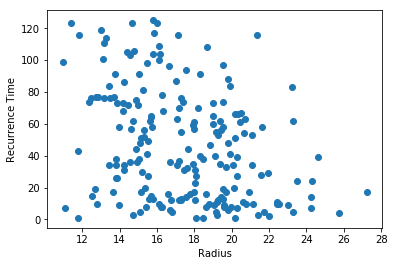

In [25]:
#making a scatter plot with matplotlib is very easy

plt.scatter(df['0'],df['time'])
plt.xlabel("Radius")
plt.ylabel("Recurrence Time")

Lets make a linear model and look at the residuals

In [26]:
#Make linear model
X = df.drop("time", axis=1)
y = df['time']
lm = sk.LinearRegression()
fit=lm.fit(X[["0"]],y)

We can print out the diagnostics from our regression in one nice figure!

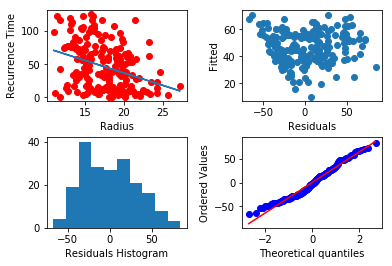

In [33]:
#Diagnostics
residuals = y-lm.predict(X[['0']])  #compute  residuals

fig, ax = plt.subplots(nrows=2, ncols=2)   #create figure and axis function. We specify the number of rows and columns
ax[0][0].scatter(X[['0']],y, color='red')  #our scatter plot
ax[0][0].plot(X[['0']],lm.predict(X[['0']])) #add our regression on top
ax[0][0].set_xlabel("Radius")
ax[0][0].set_ylabel("Recurrence Time")
ax[0][1].scatter(residuals,lm.predict(X[['0']])) #residuals vs fitted
ax[0][1].set_xlabel("Residuals")
ax[0][1].set_ylabel("Fitted")
ax[1][0].hist(residuals)                         #a histogram of our residuals
ax[1][0].set_xlabel("Residuals Histogram")
stats.probplot(residuals, dist="norm", plot=ax[1][1]) #normal QQ plot
ax[1][1].set_title("")

fig.subplots_adjust(wspace=.4,hspace=.4) #give more space between plots